# Time-weighted averages

This notebook provides some simple examples to explain the time-weighted average calculation used in the model.

In [1]:
# pylint: disable=missing-module-docstring
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'svg'

## Example 1: Queue size

Here we have a given queue size over time:

| Interval    | Queue Size | Duration |
|-------------|------------|----------|
| 0 - 14.4    | 0          | 14.4     |
| 14.4 - 15.2 | 1          | 0.8      |
| 15.2 - 16.1 | 2          | 0.9      |
| 16.1 - 17.0 | 3          | 0.9      |

You can see that, for most of the time, there is no-one in the queue, but then a few people join at the end.

Hence, we would logically expect to see an average queue size fairly close to 0.

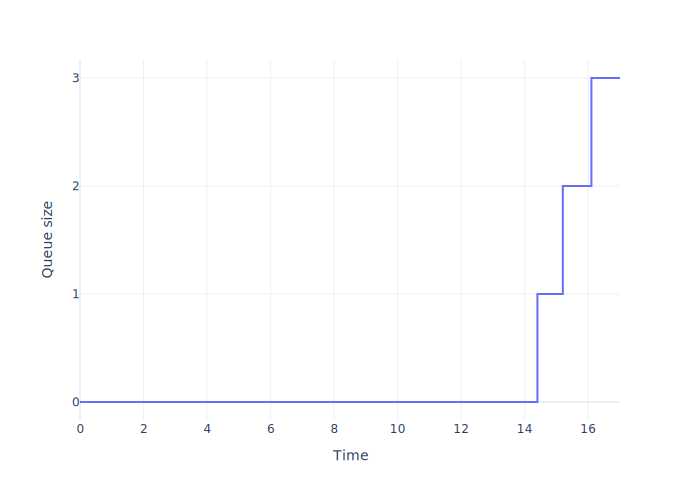

In [2]:
# Given data
time = [0.0, 14.4, 15.2, 16.1, 17.0]
queue = [0, 1, 2, 3, 3]

fig = px.line(x=time, y=queue)
fig.update_traces(mode='lines', line_shape='hv')
fig.update_xaxes(dtick=2)
fig.update_yaxes(dtick=1)
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Queue size',
    template='plotly_white')
fig.show()

### Simple average

#### Formula for simple average queue size:

$$
\text{Simple Average} = \frac{\sum (\text{Queue Size})}{\text{Number of Intervals}}
$$

#### Applying values:

$$
= \frac{0 + 1 + 2 + 3}{4}
$$

$$
= \frac{6}{4} = 1.5
$$

With a simple average, we find quite a high average: 1.5.

In [3]:
simple_avg = sum(queue[:-1]) / len(queue[:-1])
print(f'Simple Average Queue Size: {simple_avg}')

Simple Average Queue Size: 1.5


### Time-weighted average

#### Formula for time-weighted average queue size:

$$
\text{Time-Weighted Average} = \frac{\sum (\text{Queue Size} \times \text{Time Duration})}{\text{Total Time}}
$$

#### Applying values:

$$
= \frac{(0 \times 14.4) + (1 \times 0.8) + (2 \times 0.9) + (3 \times 0.9)}{17.0}
$$

$$
= \frac{0 + 0.8 + 1.8 + 2.7}{17.0}
$$

$$
= \frac{5.3}{17.0} \approx 0.312
$$

The time-weighted average better meets our expectations, being fairly close to 0.

In [4]:
# Compute time-weighted sum
weighted_sum = sum(
    queue[i] * (time[i+1] - time[i]) for i in range(len(time)-1))

# Total time duration
# pylint:disable=invalid-name
total_time = time[-1] - time[0]

# Compute time-weighted average
time_weighted_avg = weighted_sum / total_time

print(f'Time-Weighted Average Queue Size: {time_weighted_avg}')

Time-Weighted Average Queue Size: 0.3117647058823529


## Example 2: Utilisation

Building on our queue example:

* There are **2 nurses** in this system.
* Five patients arrive during the observation period - 2 at the start, and 3 near the end.
* **Patients A and B** are seen immediately, and each has a long consultation.
* **Patients C, D, and E** arrive and wait in the queue since no nurses are available, and are still waiting at the end of the observation period.

| Time | Event | Patients in system | Nurses busy | Queue size |
| - | - | - | - | - |
| 0.0 | Clinic opens |0 | 0 | 0 |
| 1.2 | Patient A arrives, sees nurse for 19 | 1 | 1 | 0 |
| 2.3 | Patient B arrives, sees nurse for 20 | 2 | 2 | 0 |
| 14.4 | Patient C arrives, waits for nurse | 3 | 2 | 1 |
| 15.2 | Patient D arrives, waits for nurse | 4 | 2 | 2 |
| 16.1 | Patient E arrives, waits for nurse | 5 | 2 | 3 |
| 17.0 | Simulation ends, three patients waiting still | 5 | 2 | 3 |

The utilisation of the nurses will depend on how many are busy at each point in time.

* When **no nurses** are busy, utilisation is **0.0** (i.e. 0%).
* When **one nurse** is busy, utilisation is **0.5** (i.e. 50%).
* When **two nurses** are busy, utilisation is **1.0** (i.e. 100%).

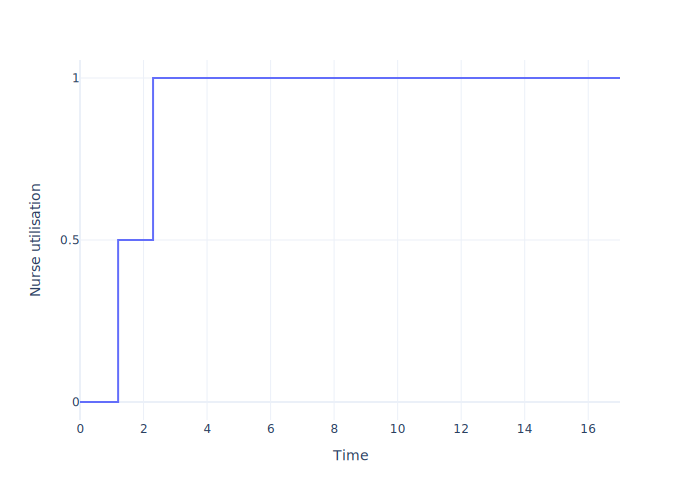

In [5]:
time = [0.0, 1.2, 2.3, 14.4, 15.2, 16.1, 17.0]
utilisation = [0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]

fig = px.line(x=time, y=utilisation)
fig.update_traces(mode='lines', line_shape='hv')
fig.update_xaxes(dtick=2)
fig.update_yaxes(dtick=0.5)
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Nurse utilisation',
    template='plotly_white')
fig.show()

In this scenario, we'd expect to see an average utilisation close to 1, as there was full utilisation for most of the observation period.

### Simple average

#### Formula for simple average utilisation

$$
\text{Simple Average} = \frac{\sum (\text{Utilisation})}{\text{Number of Intervals}}
$$

#### Applying values:

$$
= \frac{0 + 0.5 + 1 + 1 + 1 + 1 + 1}{7} = 0.7857
$$


In [6]:
simple_avg = sum(utilisation) / len(utilisation)
print(f'Simple Average Utilisation: {simple_avg}')

Simple Average Utilisation: 0.7857142857142857


### Time-weighted average

#### Formula for time-weighted utilisation

$$
\text{Time-Weighted Average} = \frac{\sum (\text{Utilisation} \times \text{Time Duration})}{\text{Total Time}}
$$

#### Applying values:

$$
= \frac{(0 \times 1.2) + (0.5 \times 1.1) + (1 \times 14.7)}{17.0}
$$

$$
= \frac{0 + 0.55 + 14.7}{17.0} \approx 0.897
$$

In [7]:
weighted_sum = sum(
    utilisation[i] * (time[i+1] - time[i]) for i in range(len(time)-1)
)

# Total time duration
total_time = time[-1] - time[0]

time_weighted_avg = weighted_sum / total_time
print(f'Time-Weighted Average Utilisation: {time_weighted_avg}')

Time-Weighted Average Utilisation: 0.8970588235294119


When calculating the time-weighted average, we indeed observe a higher average utilisation, better reflecting the reality of utilisation during the observation period.